In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from random import randint

In [2]:
cdata = pd.read_csv("https://raw.githubusercontent.com/benvictoria17/DataAnalytics/master/dataset/Exports%20and%20Imports%20of%20India(1997-2022)/exports%20and%20imports%20of%20india(1997-2022)%20-%20exports%20and%20imports.csv")

In [3]:
cdata.shape

(5767, 7)

In [4]:
round(cdata.isnull().mean()*100,2)

Country          0.00
Export           0.14
Import           9.22
Total Trade      9.81
Trade Balance    9.81
Year(start)      0.00
Year(end)        0.00
dtype: float64

In [5]:
cdata = cdata.dropna()
cdata.head()

,Country,Export,Import,Total Trade,Trade Balance,Year(start),Year(end)
0,AFGHANISTAN,21.25,10.7,31.95,10.55,97,98
1,AFGHANISTAN,12.81,28.14,40.95,-15.33,98,99
2,AFGHANISTAN,33.2,21.06,54.26,12.15,99,2000
3,AFGHANISTAN,25.86,26.59,52.45,-0.73,2000,2001
4,AFGHANISTAN,24.37,17.52,41.89,6.85,2001,2002


In [6]:
cdata.dtypes

Country          object
Export           object
Import           object
Total Trade      object
Trade Balance    object
Year(start)       int64
Year(end)         int64
dtype: object

In [7]:
cdata['Export'] = cdata['Export'].str.replace(',','')
cdata['Import'] = cdata['Import'].str.replace(',','')
cdata['Total Trade'] = cdata['Total Trade'].str.replace(',','')
cdata['Trade Balance'] = cdata['Trade Balance'].str.replace(',','')
cdata['Export'] = cdata['Export'].astype('float')
cdata['Import'] = cdata['Import'].astype('float')
cdata['Total Trade'] = cdata['Total Trade'].astype('float')
cdata['Trade Balance'] = cdata['Trade Balance'].astype('float')
cdata.dtypes

Country           object
Export           float64
Import           float64
Total Trade      float64
Trade Balance    float64
Year(start)        int64
Year(end)          int64
dtype: object

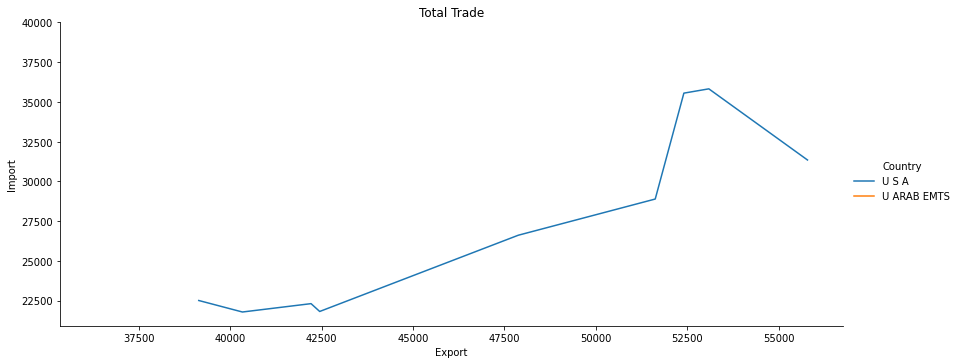

In [8]:
ctotal = cdata.groupby(['Country']).agg('sum', numeric_only=True)
x = [randint(1997, 2022) for p in range(0, 243)]
top_ten = cdata.nlargest(10, ['Export'])
sns.relplot(
    data=top_ten, 
    x="Export", y="Import", hue="Country",
    height=5, aspect=2.4, 
    kind="line"
).set(
    title="Total Trade", 
    ylabel="Import",
    xlabel="Export"
)